# Hypothesis Tests

**Research question:**  
> What makes a horror film truly scary and disturbing?

- **H₀:** Fear-related keywords in user reviews do not affect review sentiment, and review sentiment does not correlate with IMDb rating.  
- **H₁:** Fear-related keywords in user reviews affect review sentiment, and review sentiment correlates with IMDb rating.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, pearsonr

# Load cleaned data
movies = pd.read_csv("../data_clean/movies_clean.csv")
reviews = pd.read_csv("../data_clean/reviews_tmdb_clean.csv")

print("Movies shape:", movies.shape)
print("Reviews shape:", reviews.shape)

Movies shape: (836, 8)
Reviews shape: (2099, 7)


In [5]:
movies.head()

,title,year,runtime_min,genre,imdb_rating,director,votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,905275,$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,689068,$32.00M
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,1051582,$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,439793,$13.78M
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,53297,NaN


In [6]:
reviews.head()


,tmdb_id,author,review_text,created_at,rating,title,year
0,348,Patrick E. Abe,"Described by Roger Ebert as a ""trapped in a ha...",2016-09-21T08:25:53.208Z,8.0,Alien,1979
1,348,John Chard,There is a clause in the contract which specif...,2019-05-12T22:00:41.553Z,10.0,Alien,1979
2,348,Repo Jack,"The standard bearer of horror in space, Ridley...",2020-10-28T03:47:15.868Z,10.0,Alien,1979
3,348,r96sk,"<em>'Alien'</em> isn't as eventful, and as suc...",2022-02-21T20:06:15.195Z,8.0,Alien,1979
4,348,GenerationofSwine,"Horror in Space, that's what this is. It's a s...",2023-01-13T23:03:48.663Z,10.0,Alien,1979


In [7]:
# Fear keyword flag:
fear_keywords = [
    "death", "dark", "darkness", "alone", "isolation", "blood",
    "killer", "kill", "dead", "monster", "fear", "scream",
    "terrifying", "disturbing", "horror", "nightmare", "ghost",
    "violence", "panic", "tension"
]

def has_fear_word(text):
    text = str(text).lower()
    return any(word in text for word in fear_keywords)

reviews["has_fear_keyword"] = reviews["review_text"].apply(has_fear_word)

reviews["has_fear_keyword"].value_counts()


has_fear_keyword
True     1434
False     665
Name: count, dtype: int64

In [8]:
# Sentiment label from review ratings:
# Will use 3 classes: positive (7-10), neutral (5-6), negative (0-4)
# Mapped these  classes into numbers: negative=0, neutral=1, positive=2

def rating_to_sentiment(r):
    if r >= 7:
        return "positive"
    elif r >= 5:
        return "neutral"
    else:
        return "negative"

reviews["sentiment"] = reviews["rating"].apply(rating_to_sentiment)
reviews["sentiment_numeric"] = reviews["sentiment"].map({
    "negative": 0,
    "neutral": 1,
    "positive": 2
})

reviews[["rating", "sentiment", "sentiment_numeric"]].head()

,rating,sentiment,sentiment_numeric
0,8.0,positive,2
1,10.0,positive,2
2,10.0,positive,2
3,8.0,positive,2
4,10.0,positive,2


In [9]:
# Merging reviews with IMDb movie ratingss
merged = reviews.merge(
    movies[["title", "year", "imdb_rating"]],
    on=["title", "year"],
    how="left"
)

print("Merged shape:", merged.shape)
merged[["title", "year", "rating", "sentiment", "sentiment_numeric",
        "has_fear_keyword", "imdb_rating"]].head(10)

Merged shape: (2099, 11)


,title,year,rating,sentiment,sentiment_numeric,has_fear_keyword,imdb_rating
0,Alien,1979,8.0,positive,2,True,8.5
1,Alien,1979,10.0,positive,2,True,8.5
2,Alien,1979,10.0,positive,2,True,8.5
3,Alien,1979,8.0,positive,2,True,8.5
4,Alien,1979,10.0,positive,2,True,8.5
5,Alien,1979,9.0,positive,2,True,8.5
6,Alien,1979,7.0,positive,2,True,8.5
7,Alien,1979,7.0,positive,2,False,8.5
8,Alien,1979,10.0,positive,2,False,8.5
9,Alien,1979,10.0,positive,2,False,8.5


**Test 1: Do fear keywords change sentiment**

If fear-related keywords really reflect intense or disturbing experiences,  
then reviews that contain such keywords should have different sentiment scores  
than reviews that do not contain them.

In [10]:
#Anova test: Keyword vs Sentiment
sent_with_keyword = merged[merged["has_fear_keyword"] == True]["sentiment_numeric"]
sent_without_keyword = merged[merged["has_fear_keyword"] == False]["sentiment_numeric"]

print("Number of reviews with keyword:", len(sent_with_keyword))
print("Number of reviews without keyword:", len(sent_without_keyword))

anova_result = f_oneway(sent_with_keyword, sent_without_keyword)

print("\nANOVA – Sentiment difference based on fear keywords")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)


Number of reviews with keyword: 1434
Number of reviews without keyword: 665

ANOVA – Sentiment difference based on fear keywords
F-statistic: 22.3898406895989
p-value: 2.3739102578196764e-06


/var/folders/n0/wmhxgjv96zgczm6sjm_jc0c80000gn/T/ipykernel_54900/2732903674.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


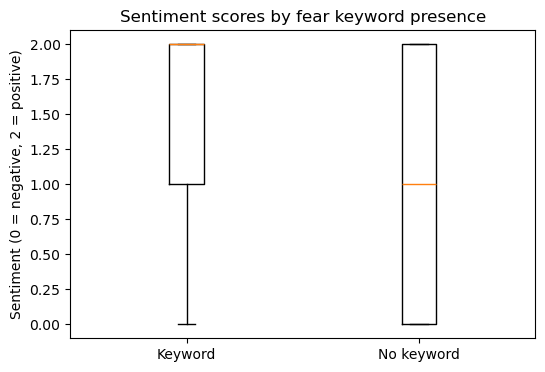

In [ ]:
# Test 1: Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(
    [sent_with_keyword, sent_without_keyword],
    labels=["Keyword", "No keyword"]
)
plt.ylabel("Sentiment (0 = negative, 2 = positive)")
plt.title("Sentiment scores by fear keyword presence")
plt.show()

In [14]:
# Test 2: Average sentiment per movie + Pearson correlation

# 1) average sentiment per movie
avg_sentiment = merged.groupby(["title", "year"])["sentiment_numeric"].mean().reset_index()
avg_sentiment.rename(columns={"sentiment_numeric": "avg_sentiment"}, inplace=True)

# 2) + imdb_rating
avg_sentiment = avg_sentiment.merge(
    movies[["title", "year", "imdb_rating"]],
    on=["title", "year"],
    how="left"
)

avg_sentiment.head()

,title,year,avg_sentiment,imdb_rating
0,#Alive,2020,2.000000,6.3
1,10 Cloverfield Lane,2016,1.800000,7.2
2,13 Sins,2014,1.000000,6.3
3,1408,2007,1.500000,6.8
4,1922,2017,1.333333,6.2


In [15]:
# 3) correlation between avg_sentiment and imdb_rating
corr, p_value = pearsonr(avg_sentiment["avg_sentiment"], avg_sentiment["imdb_rating"])

print("Pearson correlation between avg sentiment and IMDb rating")
print("Correlation:", corr)
print("p-value:", p_value)

Pearson correlation between avg sentiment and IMDb rating
Correlation: 0.4650513397879028
p-value: 6.167443791217642e-37


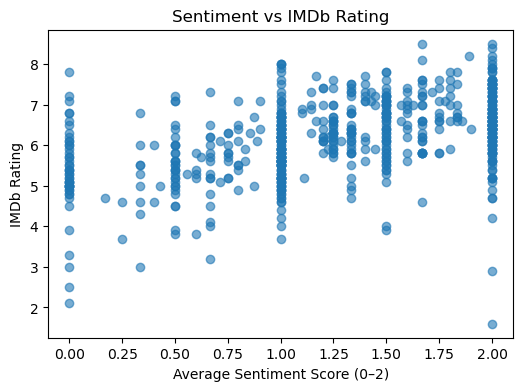

In [16]:
# Scatterplot of avg_sentiment vs imdb_rating
plt.figure(figsize=(6,4))
plt.scatter(avg_sentiment["avg_sentiment"], avg_sentiment["imdb_rating"], alpha=0.6)
plt.xlabel("Average Sentiment Score (0–2)")
plt.ylabel("IMDb Rating")
plt.title("Sentiment vs IMDb Rating")
plt.show()